## Various negatives in train set and baseline model visualisation

In [20]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
import math
from plotly.subplots import make_subplots
import nbformat

In [21]:
"""
DATA TYPES: 
    original = original data
    shuffled = both pos_train and neg_train are shuffled (only information left is difference in GC content)
    sameGC = neg_train as shuffled pos_train (no information)
"""
rbp24_df = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp24_baseline_results.tsv", delimiter="\t", index_col=0, header=0)
rbp24_df['DeltaGC'] = rbp24_df.PosGC - rbp24_df.NegGC
rbp24_df['Dataset'] = "RBP24"

rbp31_df = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_baseline_results.tsv", delimiter="\t", index_col=0, header=0)
rbp31_df['DeltaGC'] = rbp31_df.PosGC - rbp31_df.NegGC
rbp31_df['Dataset'] = "RBP31"

df = pd.concat([rbp24_df, rbp31_df], ignore_index=True).reset_index(drop=True)

#### Test AUC score distribution

<AxesSubplot:xlabel='TestAUC', ylabel='Count'>

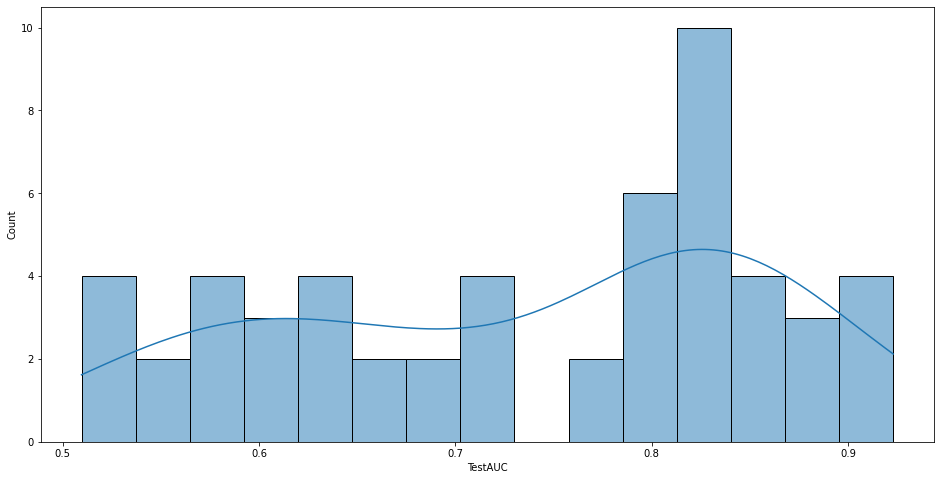

In [22]:
original_df = df.loc[df['DataType'] == 'original']
plt.figure(figsize=(16, 8))
sns.histplot(data=original_df, x='TestAUC', kde=True, bins=15)

#### Delta GC distribution in both datasets

<AxesSubplot:xlabel='DeltaGC', ylabel='Count'>

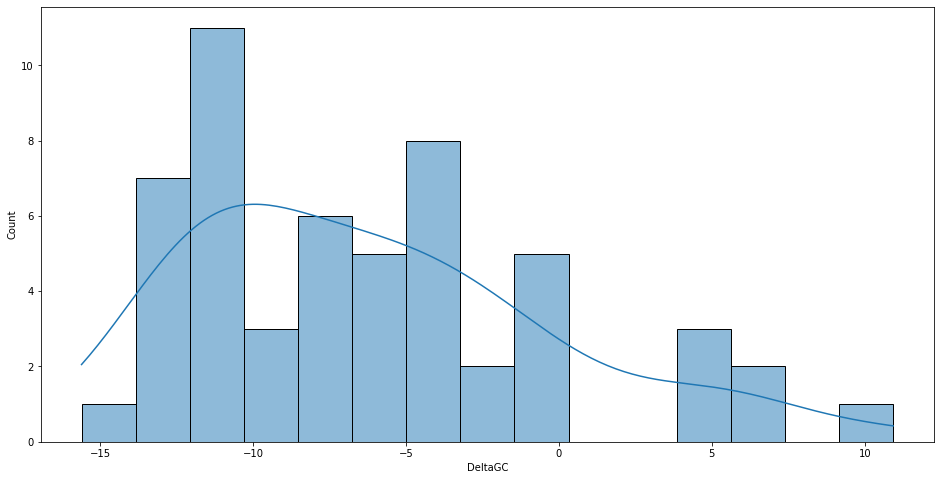

In [23]:
plt.figure(figsize=(16, 8))
sns.histplot(data=original_df, x='DeltaGC', kde=True, bins=15)

Lets plot a histogram of proteins where test AUC is bigger than 70%

<AxesSubplot:xlabel='DeltaGC', ylabel='Count'>

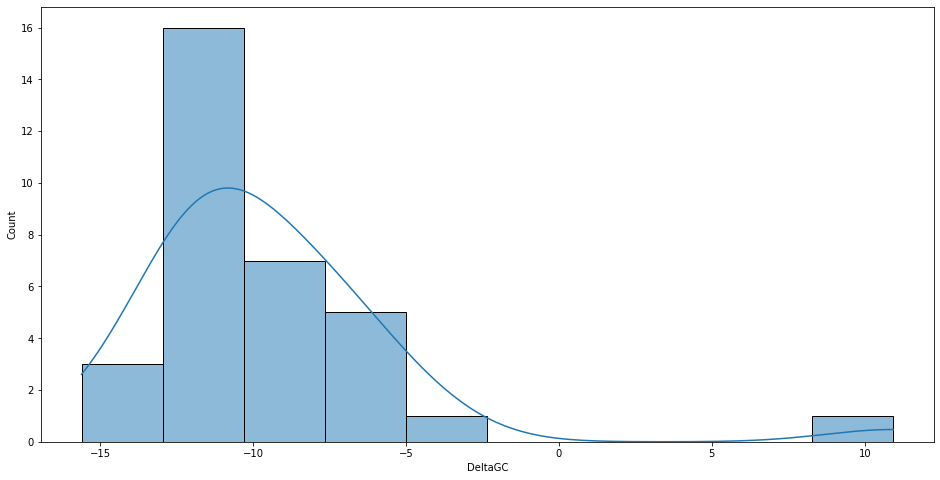

In [24]:
high_score_df = original_df.loc[df['TestAUC'] >= 0.7]
plt.figure(figsize=(16, 8))
sns.histplot(data=high_score_df, x='DeltaGC', kde=True, bins=10)

## GC content influence on LogReg performance

### Performance

In [25]:
rbp24_original_AUC = rbp24_df[rbp24_df.DataType=="original"].TestAUC.mean()
rbp24_sameGC_AUC = rbp24_df[rbp24_df.DataType=="sameGC"].TestAUC.mean()
rbp24_shuffled_AUC = rbp24_df[rbp24_df.DataType=="shuffled"].TestAUC.mean()

print(f"RBP24\nOriginal:{rbp24_original_AUC}\nsameGC:{rbp24_sameGC_AUC}\nshuffled{rbp24_shuffled_AUC}")

RBP24
Original:0.7404948789470158
sameGC:0.6946944786079813
shuffled0.6681069619029547


In [26]:
rbp31_original_AUC = rbp31_df[rbp31_df.DataType=="original"].TestAUC.mean()
rbp31_sameGC_AUC = rbp31_df[rbp31_df.DataType=="sameGC"].TestAUC.mean()
rbp31_shuffled_AUC = rbp31_df[rbp31_df.DataType=="shuffled"].TestAUC.mean()

print(f"RBP31\nOriginal:{rbp31_original_AUC}\nsameGC:{rbp31_sameGC_AUC}\nshuffled{rbp31_shuffled_AUC}")

RBP31
Original:0.7311799872311827
sameGC:0.6315794108422941
shuffled0.6845391615143368


##### PLOTLY

In [27]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import nbformat

In [28]:
pos_df = df[df.DeltaGC >= 0]
neg_df = df[df.DeltaGC <= 0]

rbp24_pos_df = rbp24_df[rbp24_df.DeltaGC >= 0]
rbp24_neg_df = rbp24_df[rbp24_df.DeltaGC <= 0]

rbp31_pos_df = rbp31_df[rbp31_df.DeltaGC >= 0]
rbp31_neg_df = rbp31_df[rbp31_df.DeltaGC <= 0]

In [29]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [31]:
fig = px.scatter(df, 
                 x=df.DeltaGC,  
                 y=df.TestAUC, 
                 color="DataType", 
                 hover_name="Protein")

colors = ['#636EFA', '#EF553B', '#00CC96']
data_types = ["sameGC","original", "shuffled"]

for i in range(3):

    data_type_df = df[df.DataType==data_types[i]]
    X = data_type_df.DeltaGC.values.reshape(-1, 1)
    x_range = np.linspace(X.min(), X.max(), len(data_type_df)).reshape(-1, 1)

    poly = PolynomialFeatures(2)
    poly.fit(X)
    X_poly = poly.transform(X)
    x_range_poly = poly.transform(x_range)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly, data_type_df.TestAUC)
    y_poly = model.predict(x_range_poly)

    fig.add_traces(go.Scatter(x=x_range.squeeze(), y=y_poly, name=data_types[i], marker_color=colors[i]))

fig.update_layout(
    autosize=False,
    #template="simple_white",
    font_family="Times New Roman",
    font_size=18,
    width=1000,
    height=600,
    showlegend=True)

fig.show()

### Varios test sets

In [78]:
rbp24_df = pd.read_csv("../Data/outputs/rbp24_baseline_evals.tsv", delimiter="\t", header=0, index_col=0)
rbp24_df = rbp24_df[rbp24_df['DataType'] != "distributed_negatives"]
rbp24_df['DeltaGC'] = rbp24_df.PosGC - rbp24_df.NegGC

rbp31_df = pd.read_csv("../Data/outputs/rbp31_baseline_evals.tsv", delimiter="\t", header=0, index_col=0)
rbp31_df = rbp31_df[rbp31_df['DataType'] != "distributed_negatives"]
rbp31_df['DeltaGC'] = rbp31_df.PosGC - rbp31_df.NegGC

df = pd.concat([rbp24_df, rbp31_df], ignore_index=True).reset_index(drop=True)
df = df[df["DeltaGC"] > 0]

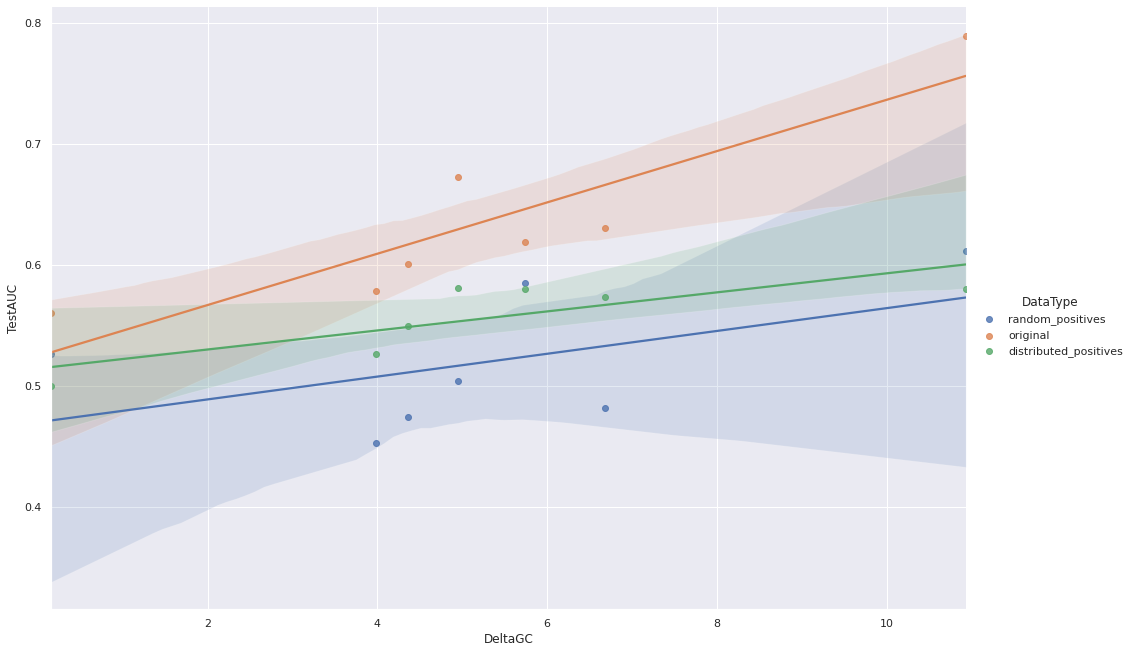

In [79]:
sns.lmplot(x="DeltaGC", y="TestAUC", hue='DataType', data=df, height=9, aspect=1.5)

In [ ]:
gc_df_rbp24 = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/testsets_GC_counts_rbp24", delimiter="\t", index_col=0, header=0)
gc_df_rbp24 = gc_df_rbp24[gc_df_rbp24['DataType'] != "distributed_negatives"]

In [81]:
highgc_df_rbp24 = gc_df_rbp24[gc_df_rbp24["DeltaGC"] > 0]
#highgc_df_rbp24 = highgc_df_rbp24[highgc_df_rbp24["DeltaGC"] > 0]

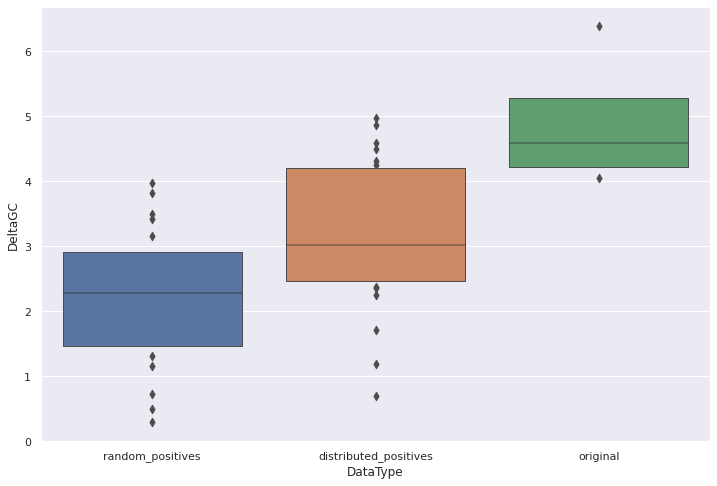

In [82]:
plt.figure(figsize=(12, 8))
ax = sns.boxenplot(x="DataType", y="DeltaGC",
              scale="linear", data=highgc_df_rbp24)

## Interesting proteins
- TAF15_HEK293 - original, shuffled, sameGC - Decling trend in AUC with same spacings inbetween each category (original being highest)
- CLIPSEQ_ELAVL1 - same as TAF15 only sameGC has bigger AUC than shuffled
- UPF1_HELA - original and shuffled with similar AUC, sameGC with much lower AUC
- ICLIP_HNRNPC - original and sameGC with almost equal AUC, shuffled with much lower AUC
- HNRNPK_K562 - Low deltaGC, big difference between (original,shuffled) and sameGC

## Protein analysis

In [83]:
from utils import *
from models.baseline import *
sns.set()

In [84]:
def get_gc_count_from_ohe(train_df):
    """
    Calculates GC content in sequence for positive and negative sequences separately
    """
    X_train, y_train = get_X_y(train_df)

    pos_counts = X_train[y_train == 1].reshape(-1, 4).sum(axis=0)
    neg_counts = X_train[y_train == 0].reshape(-1, 4).sum(axis=0)

    pos_gc = (sum(pos_counts[1:3]) * 100) / sum(pos_counts)
    neg_gc = (sum(neg_counts[1:3]) * 100) / sum(neg_counts)

    return pos_gc, neg_gc

In [125]:
def process_protein(protein_path):
    protein_specs = []
    for file in os.listdir(protein_path):
        if file.endswith("tsv.gz"):
            df_type = file[:-7]
            train_path = str(protein_path) + "/" + file
            test_path = str(protein_path)[:-6] + "/test/original.tsv.gz"

            train_df = pd.read_csv(train_path, delimiter="\t", header=0, index_col=0, compression='gzip')
            test_df = pd.read_csv(test_path, delimiter="\t", header=0, index_col=0, compression='gzip')

            pos_gc, neg_gc = get_gc_count_from_ohe(train_df)
            delta_gc =  abs(pos_gc - neg_gc)

            test_acc_score, test_auc_score, baseline = baseline_sklearn(train_df, test_df)
            protein_specs.append((df_type, test_auc_score, baseline, delta_gc))

    return protein_specs


def logreg_feature_importance(baseline, df_type, test_auc_score, name, delta_gc):
    logreg = baseline
    importances = logreg.coef_.ravel()

    leg=["A", "C", "G", "T"]
    repeated_amino =  leg * (len(importances)//4) #np.kron(np.ones(len(importances)//5), np.arange(5))
    
    fig = px.bar(y=importances, x=np.arange(len(importances)), color=repeated_amino)

    
    fig.update_xaxes(title_text='Sequence lenght')
    fig.update_yaxes(title_text='Nucleotide importance')

    fig.update_layout(
        autosize=False,
        title = f"Feature importances of {name} protein. Data type: {df_type}, Test AUC: {test_auc_score:.2f}, Delta GC: {delta_gc:.2f}",
        font_family="Times New Roman",
        font_size=18,
        width=1500,
        height=500,
        showlegend=True)

    fig.show()

### TIA1_RBP31
- Delta GC = 12.4
- Original AUC = 0.86
- Shuffled AUC = 0.80
- Same GC AUC = 0.74

Big GC difference and strong pattern

In [126]:
TIA1_RBP31 = Path("/home/mrkvrbl/Diplomka/Data/rbp31/ICLIP_TIA1/train")

TIA1_specs = process_protein(TIA1_RBP31)
print(TIA1_specs)

for entry in TIA1_specs:
    (df_type, AUC, baseline, delta_gc) = entry
    logreg_feature_importance(baseline, df_type, AUC, "TIA1", delta_gc)

[('sameGC', 0.7225719374999999, LogisticRegression(max_iter=200), 0.049917491749177145), ('original', 0.856643, LogisticRegression(max_iter=200), 13.142161716171614), ('shuffled', 0.8167921874999999, LogisticRegression(max_iter=200), 13.142161716171614)]


### NSUN2_RBP31
- Delta GC = 10.92
- Original AUC = 0.79
- Shuffled AUC = 0.73
- Same GC AUC = 0.66

Big GC difference and strong motif

In [127]:
NSUN2_RBP31 = Path("/home/mrkvrbl/Diplomka/Data/rbp31/ICLIP_NSUN2_293/train")

NSUN2_specs = process_protein(NSUN2_RBP31)
print(NSUN2_specs)

for entry in NSUN2_specs:
    (df_type, AUC, baseline, delta_gc) = entry
    logreg_feature_importance(baseline, df_type, AUC, "NSUN2", delta_gc)

[('sameGC', 0.6617994374999999, LogisticRegression(max_iter=200), 0.09236798679868485), ('original', 0.7890858749999999, LogisticRegression(max_iter=200), 11.165552805280527), ('shuffled', 0.73873175, LogisticRegression(max_iter=200), 11.165552805280527)]


### PUM2
- Delta GC = 15.6
- Original AUC = 0.87
- Shuffled AUC = 0.86
- Same GC AUC = 0.69

Huge GC difference, mediocre motif.

In [128]:
PUM2_RBP31 = Path("/home/mrkvrbl/Diplomka/Data/rbp31/PARCLIP_PUM2/train")

PUM2_specs = process_protein(PUM2_RBP31)
print(PUM2_specs)

for entry in PUM2_specs:
    (df_type, AUC, baseline, delta_gc) = entry
    logreg_feature_importance(baseline, df_type, AUC, "PUM2", delta_gc)

[('sameGC', 0.669932125, LogisticRegression(max_iter=200), 0.002846534653468069), ('original', 0.8745143750000001, LogisticRegression(max_iter=200), 16.43516914191419), ('shuffled', 0.8580318124999999, LogisticRegression(max_iter=200), 16.43516914191419)]


### MOV10
- Delta GC = 10.4
- Original AUC = 0.77
- Shuffled AUC = 0.76
- Same GC AUC = 0.53

Big GC difference, weak pattern

In [129]:
MOV10_RBP31 = Path("/home/mrkvrbl/Diplomka/Data/rbp31/PARCLIP_MOV10/train")

MOV10_specs = process_protein(MOV10_RBP31)
print(MOV10_specs)

for entry in MOV10_specs:
    (df_type, AUC, baseline, delta_gc) = entry
    logreg_feature_importance(baseline, df_type, AUC, "MOV10", delta_gc)

[('sameGC', 0.529856875, LogisticRegression(max_iter=200), 0.09480198019802089), ('original', 0.7651008749999999, LogisticRegression(max_iter=200), 10.634179042904286), ('shuffled', 0.7620945625000002, LogisticRegression(max_iter=200), 10.634179042904286)]


### POS/NEG counts, datasets length

In [27]:
from utils.utils import get_X_y
import pandas as pd
import os

rbp24_path = "/home/mrkvrbl/Diplomka/Data/rbp24/processed"
rbp31_path = "/home/mrkvrbl/Diplomka/Data/rbp31/"

In [92]:
def get_counts(dataset_path):
    content = []
    for root, dirs, files in os.walk(dataset_path): #for root, dirs, files in os.walk(rbp24_path):
        if len(dirs) == 2:
            protein_name = root.split('/')[-1]
        if root.endswith('train'):
            df_path  = root + '/original.tsv.gz'
            df = pd.read_csv(df_path, delimiter="\t", header=0, index_col=0, compression='gzip')
            pos_df_len = len(df[df.label == 1])
            neg_df_len = len(df[df.label == 0])
            content.append([protein_name, len(df), pos_df_len, neg_df_len])
    
    return pd.DataFrame(content, columns=["Protein", "DatasetLenght", "PosLenght", "NegLenght"])

In [93]:
rbp24_counts = get_counts(rbp24_path)
rbp31_counts = get_counts(rbp31_path)

In [94]:
rbp24_counts

,Protein,DatasetLenght,PosLenght,NegLenght
0,CAPRIN1_Baltz2012,16041,8140,7901
1,ICLIP_TIA1,34184,18049,16135
2,PARCLIP_IGF2BP123,15377,8539,6838
3,PARCLIP_FUS,66061,34581,31480
4,ZC3H7B_Baltz2012,40980,20962,20018
5,PARCLIP_EWSR1,31012,16292,14720
6,CLIPSEQ_AGO2,92346,48095,44251
7,C17ORF85_Baltz2012,3709,1860,1849
8,PARCLIP_ELAVL1,51249,27275,23974
9,ALKBH5_Baltz2012,2410,1213,1197


In [95]:
rbp31_counts

,Protein,DatasetLenght,PosLenght,NegLenght
0,CLIPSEQ_elF4AIII_2,30000,4197,25803
1,ICLIP_TIA1,30000,6000,24000
2,PARCLIP_IGF2BP123,30000,6000,24000
3,PARCLIP_FUS,30000,6000,24000
4,ICLIP_hnRNPC_Hela_iCLIP_all_clusters,30000,6000,24000
5,PARCLIP_EWSR1,30000,6000,24000
6,CLIPSEQ_AGO2,30000,6000,24000
7,ICLIP_U2AF65_Hela,30000,6000,24000
8,PARCLIP_ELAVL1,30000,6000,24000
9,ICLIP_hnRNPlike_U266,30000,6000,24000


### Nucleotides count

In [96]:
def get_nucleotides_counts(dataset_path):
    content = []
    for root, dirs, files in os.walk(dataset_path): #for root, dirs, files in os.walk(rbp24_path):
        if len(dirs) == 2:
            protein_name = root.split('/')[-1]
        if root.endswith('train'):
            df_path  = root + '/original.tsv.gz'
            df = pd.read_csv(df_path, delimiter="\t", header=0, index_col=0, compression='gzip')
            X_train, y_train = get_X_y(df)

            positive_counts = list(X_train[y_train == 1].reshape(-1, 4).sum(axis=0))
            positive_counts.insert(0, "Positives")

            negative_counts = list(X_train[y_train == 0].reshape(-1, 4).sum(axis=0))
            negative_counts.insert(0, "Negatives")

            content.append(positive_counts)
            content.append(negative_counts)
            content.append([protein_name, 1, 0, 0, 0])

    return pd.DataFrame(content, columns=["Protein", "A", "C", "G", "T"])

In [97]:
rbp24_nucleotid_counts = get_nucleotides_counts(rbp24_path)
rbp31_nucleotid_counts = get_nucleotides_counts(rbp31_path)

<AxesSubplot:ylabel='Protein'>

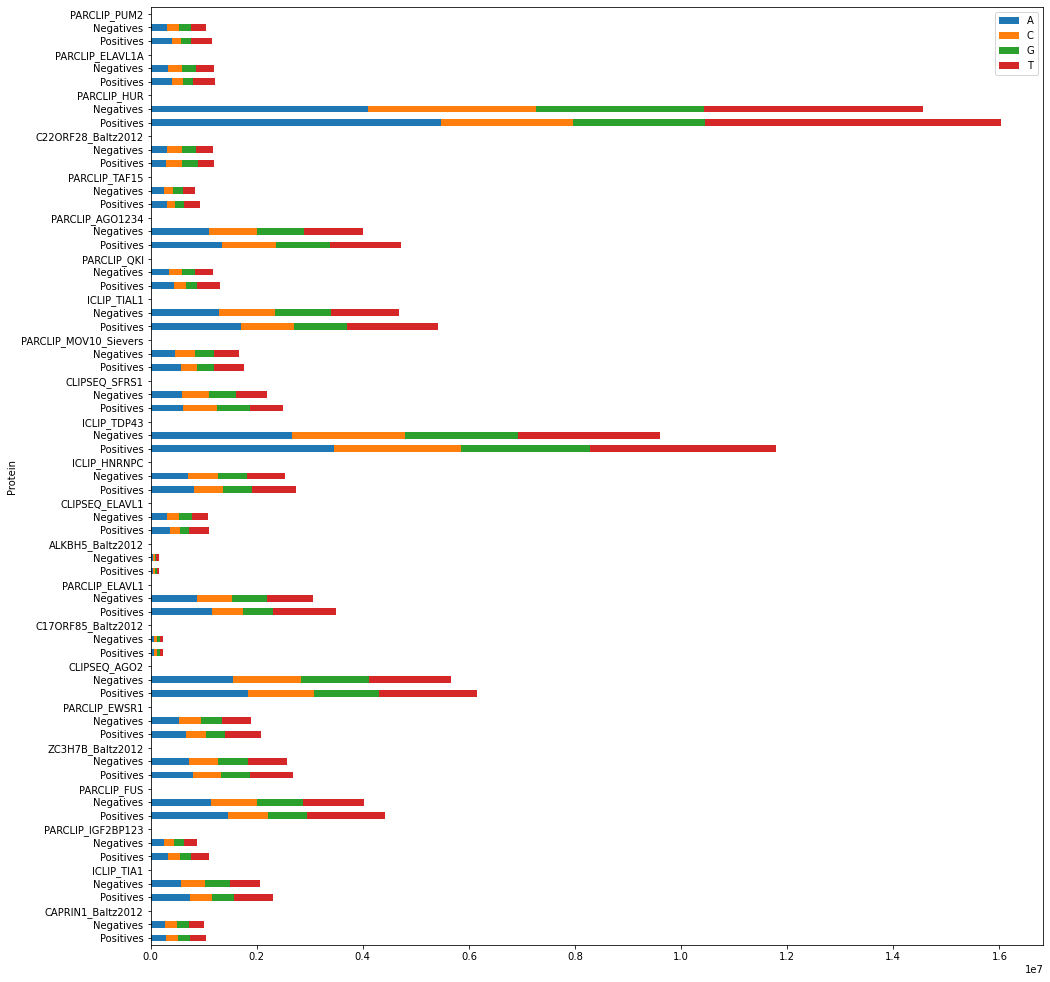

In [16]:
rbp24_nucleotid_counts.plot(x="Protein", kind='barh', stacked=True, figsize=(16,len(df)/4))

<AxesSubplot:ylabel='Protein'>

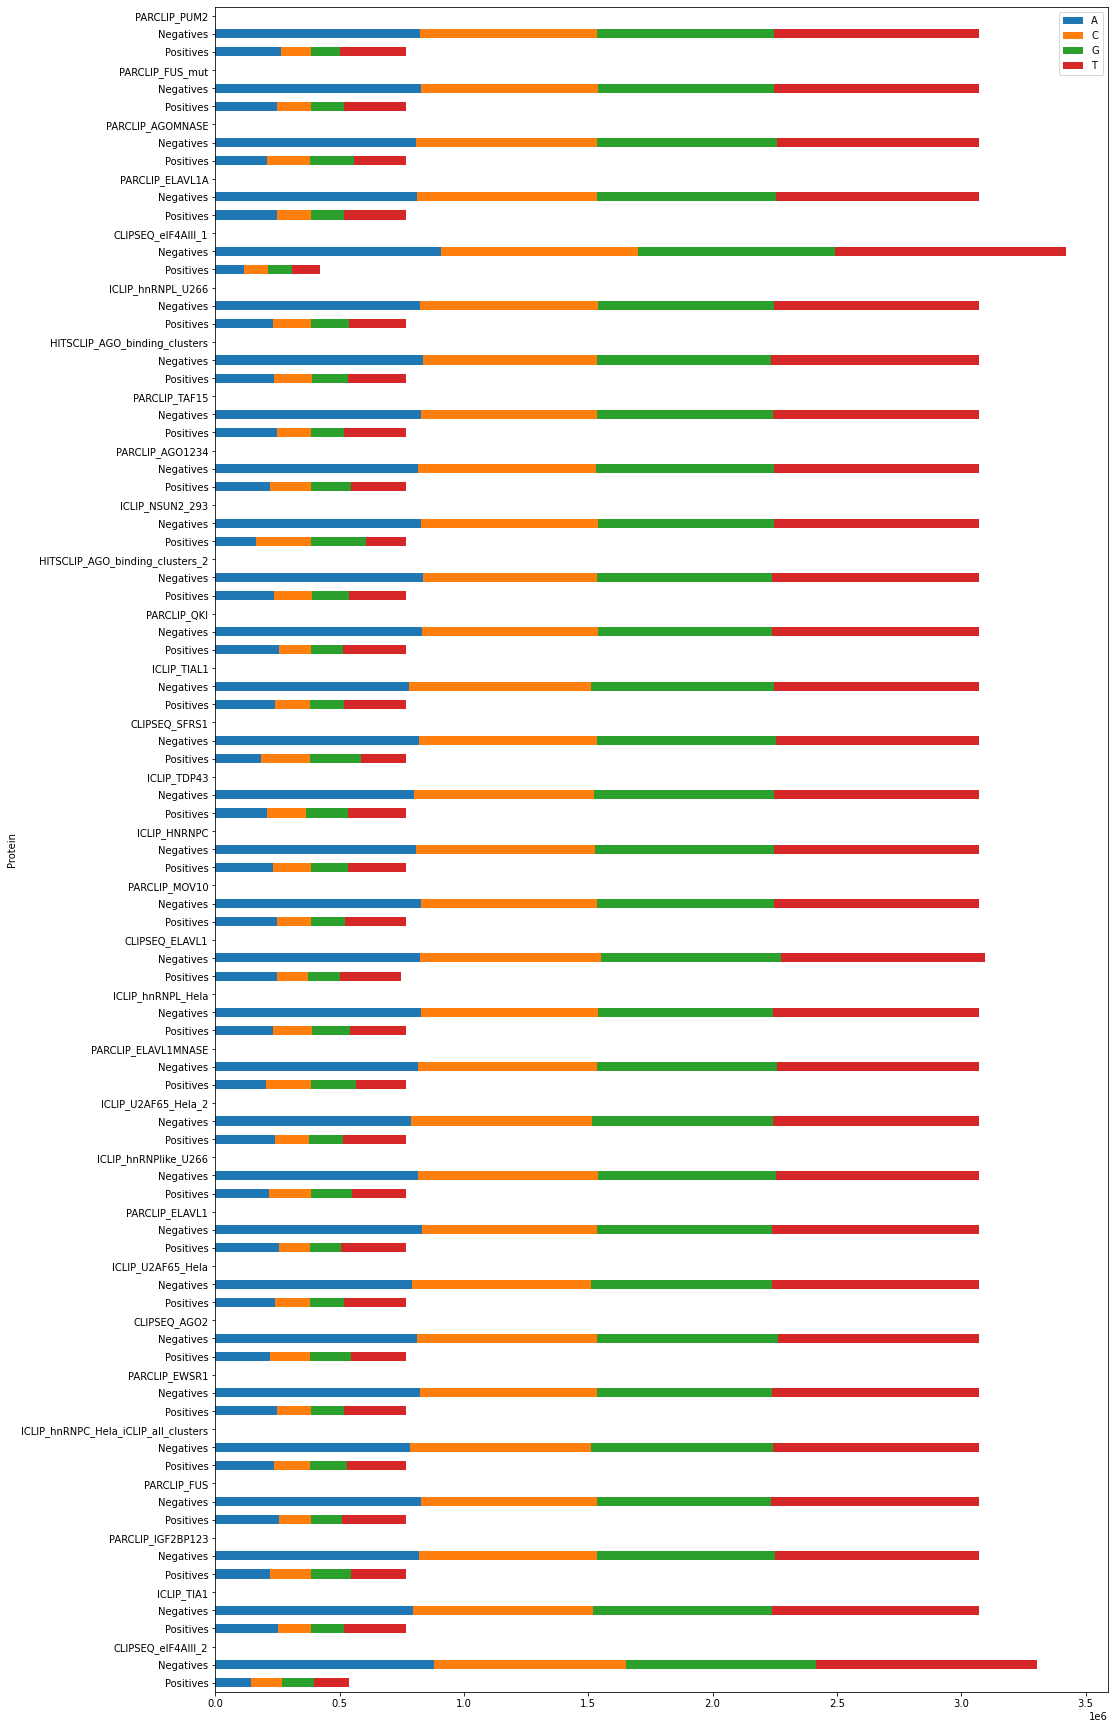

In [113]:
rbp31_nucleotid_counts.plot(x="Protein", kind='barh', stacked=True, figsize=(16,len(df)))

#### Single protein counts

In [32]:
protein_df = pd.read_csv("/home/mrkvrbl/Diplomka/Data/rbp31/PARCLIP_PUM2/train/original.tsv.gz", delimiter="\t", header=0, index_col=0, compression='gzip')
X_train, y_train = get_X_y(protein_df)
positive_counts = list(X_train[y_train == 1].reshape(-1, 4).sum(axis=0))
negative_counts = list(X_train[y_train == 0].reshape(-1, 4).sum(axis=0))

fig, ax =plt.subplots(1,2, figsize=(18, 6))

sns.barplot(y=positive_counts, x=["A", "C", "G", "T"], ax=ax[0])
ax[0].set_title("Nucleotide counts of positive sequences")
sns.barplot(y=negative_counts, x=["A", "C", "G", "T"], ax=ax[1])
ax[1].set_title("Nucleotide counts of negative sequences")

fig.show()

NameError: name 'get_X_y' is not defined

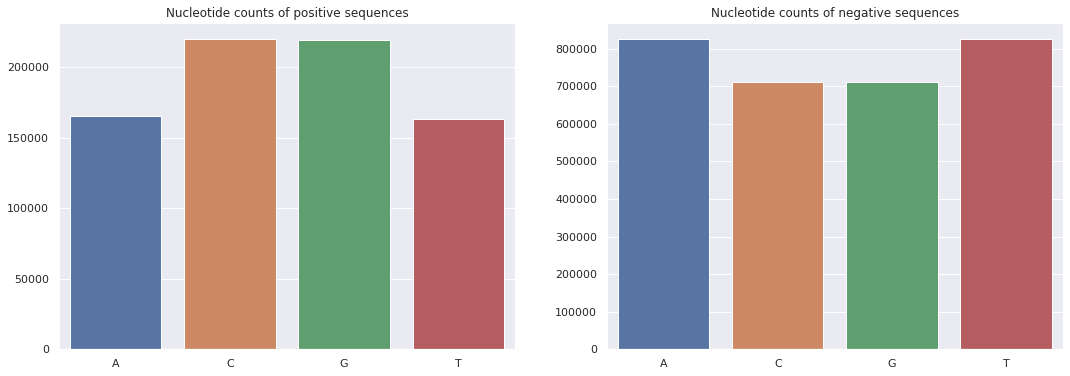

In [20]:
protein_df = pd.read_csv("/home/mrkvrbl/Diplomka/Data/rbp31/ICLIP_NSUN2_293/train/original.tsv.gz", delimiter="\t", header=0, index_col=0, compression='gzip')
X_train, y_train = get_X_y(protein_df)
positive_counts = list(X_train[y_train == 1].reshape(-1, 4).sum(axis=0))
negative_counts = list(X_train[y_train == 0].reshape(-1, 4).sum(axis=0))

fig, ax =plt.subplots(1,2, figsize=(18, 6))

sns.barplot(y=positive_counts, x=["A", "C", "G", "T"], ax=ax[0])
ax[0].set_title("Nucleotide counts of positive sequences")
sns.barplot(y=negative_counts, x=["A", "C", "G", "T"], ax=ax[1])
ax[1].set_title("Nucleotide counts of negative sequences")

fig.show()

### GC count in datasets

In [25]:
from utils.utils import gc_count

def get_gc_count(dataset_path, dataset_name):
    content = []
    for root, dirs, files in os.walk(dataset_path): #for root, dirs, files in os.walk(rbp24_path):
        if len(dirs) == 2:
            protein_name = root.split('/')[-1]
        if root.endswith('train'):
            df_path  = root + '/original.tsv.gz'
            df = pd.read_csv(df_path, delimiter="\t", header=0, index_col=0, compression='gzip')
            pos_gc, neg_gc = gc_count(df)

            delta_gc = pos_gc - neg_gc

            content.append([protein_name, dataset_name, delta_gc])

    return pd.DataFrame(content, columns=["Protein", "Dataset", "DeltaGC"])

In [26]:
rbp24_gc_counts = get_gc_count(rbp24_path, "RBP24")
rbp31_gc_counts = get_gc_count(rbp31_path, "RBP31")

In [27]:
rbp24_gc_counts

,Protein,Dataset,DeltaGC
0,CAPRIN1_Baltz2012,RBP24,-0.437133
1,ICLIP_TIA1,RBP24,-8.783773
2,PARCLIP_IGF2BP123,RBP24,-3.404458
3,PARCLIP_FUS,RBP24,-9.335411
4,ZC3H7B_Baltz2012,RBP24,-3.032460
5,PARCLIP_EWSR1,RBP24,-7.493809
6,CLIPSEQ_AGO2,RBP24,-5.205144
7,C17ORF85_Baltz2012,RBP24,6.683345
8,PARCLIP_ELAVL1,RBP24,-10.568661
9,ALKBH5_Baltz2012,RBP24,3.980685


In [28]:
deltaGC_counts_df = pd.concat([rbp24_gc_counts, rbp31_gc_counts])

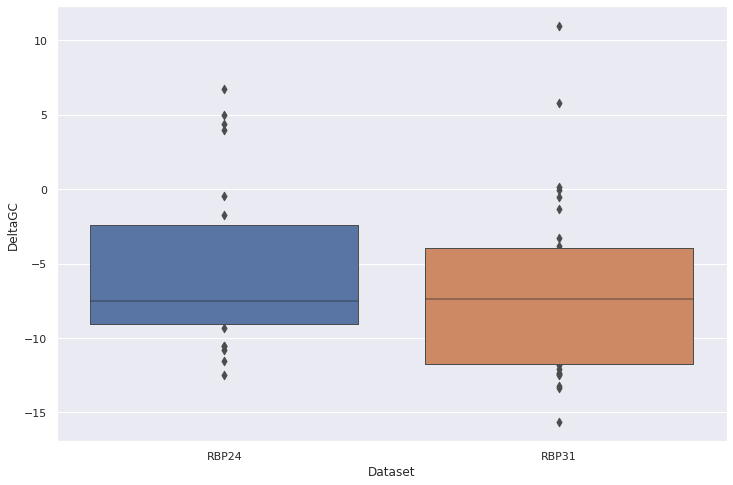

In [29]:
plt.figure(figsize=(12, 8))
ax = sns.boxenplot(x="Dataset", y="DeltaGC", data=deltaGC_counts_df)

In [106]:
def get_min_max_deltagc(df):    
    max_delta_gc = df[df["DeltaGC"] == max(df["DeltaGC"])]
    min_delta_gc = df[df["DeltaGC"] == min(df["DeltaGC"])]
    return min_delta_gc, max_delta_gc

In [107]:
rbp24_min_deltaGC, rbp24_max_deltaGC = get_min_max_deltagc(rbp24_gc_counts)
rbp24_min_max_deltaGC = pd.concat([rbp24_min_deltaGC, rbp24_max_deltaGC])
rbp24_min_max_deltaGC

,Protein,Dataset,DeltaGC
20,PARCLIP_HUR,RBP24,-12.507864
7,C17ORF85_Baltz2012,RBP24,6.683345


In [110]:
rbp31_min_deltaGC, rbp31_max_deltaGC = get_min_max_deltagc(rbp31_gc_counts)
rbp31_min_max_deltaGC = pd.concat([rbp31_min_deltaGC, rbp31_max_deltaGC])
rbp31_min_max_deltaGC

,Protein,Dataset,DeltaGC
30,PARCLIP_PUM2,RBP31,-15.60651
21,ICLIP_NSUN2_293,RBP31,10.92819


## Deep performance

### RBP 24

In [3]:
rbp24_deep_embed_results = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp24_deep_embed_results.tsv", header=0, delimiter="\t", usecols=["Name", "AUC"])
rbp24_deep_embed_results_2 = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp24_deep_embed_results2.tsv", header=0, delimiter="\t", usecols=["Name", "AUC"])
best_deep_rbp24 = np.maximum(rbp24_deep_embed_results, rbp24_deep_embed_results_2).rename(columns={"AUC":"DeepAUC"})

In [4]:
rbp24_baseline_results = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp24_baseline_results.tsv",index_col=0, header=0, delimiter="\t")
rbp24_baseline_results = rbp24_baseline_results[rbp24_baseline_results.DataType == "original"].sort_values(by=["Protein"]).rename(columns={"Protein":"Name", "TestAUC":"BaseAUC"}).reset_index(drop=True)
rbp24_baseline_results = rbp24_baseline_results.loc[:, ["Name", "BaseAUC"]]

In [5]:
rbp24_results = best_deep_rbp24.merge(rbp24_baseline_results)
pd.options.display.float_format = '{:,.3f}'.format
rbp24_results.DeepAUC

0    0.716
1    0.689
2    0.727
3    0.657
4    0.750
5    0.909
6    0.816
7    0.909
8    0.860
9    0.822
10   0.828
11   0.745
12   0.893
13   0.913
14   0.862
15   0.915
16   0.946
17   0.759
18   0.734
19   0.885
20   0.914
21   0.921
22   0.682
Name: DeepAUC, dtype: object

In [18]:
px.scatter(rbp24_results, x="BaseAUC", y="DeepAUC", hover_name="Name")

In [20]:

fig = go.Figure()

fig.add_trace(go.Scatter(x=rbp24_results.BaseAUC, y=rbp24_results.DeepAUC, mode="markers"))
fig.add_trace(go.Scatter(x=[0.5, 0.93],y=[0.5, 0.93],mode="lines"))

fig.update_layout(
    title="Baseline vs Deep model ",
    xaxis_title="Baseline AUC",
    yaxis_title="Deep AUC",
    autosize=False,
    width=500,
    height=500,
    showlegend=False)

fig.show()

In [37]:
rbp24_wide[rbp24_wide.Name == "CLIPSEQ_ELAVL1"]

,Name,PosGC,NegGC,pos_intron,pos_exon,pos_5utr,pos_3utr,pos_repeats,neg_intron,neg_exon,neg_5utr,neg_3utr,neg_repeats
5,CLIPSEQ_ELAVL1,32.589,43.407,11.750,2.980,7.250,78.020,16.590,81.780,6.650,3.300,8.270,33.070


In [35]:
rbp24_wide[rbp24_wide.Name == "ICLIP_HNRNPC"]

,Name,PosGC,NegGC,pos_intron,pos_exon,pos_5utr,pos_3utr,pos_repeats,neg_intron,neg_exon,neg_5utr,neg_3utr,neg_repeats
7,ICLIP_HNRNPC,39.716,44.048,90.330,0.750,2.020,6.890,55.870,85.730,5.440,2.970,5.860,35.330


In [34]:
rbp24_wide[rbp24_wide.Name == "ICLIP_TIA1"]

,Name,PosGC,NegGC,pos_intron,pos_exon,pos_5utr,pos_3utr,pos_repeats,neg_intron,neg_exon,neg_5utr,neg_3utr,neg_repeats
9,ICLIP_TIA1,35.905,44.688,43.010,11.660,7.290,38.030,14.520,81.900,7.220,3.660,7.220,33.150


In [31]:
rbp24_wide[rbp24_wide.Name == "PARCLIP_MOV10_Sievers"]

,Name,PosGC,NegGC,pos_intron,pos_exon,pos_5utr,pos_3utr,pos_repeats,neg_intron,neg_exon,neg_5utr,neg_3utr,neg_repeats
18,PARCLIP_MOV10_Sievers,35.899,43.653,14.420,2.250,6.740,76.590,6.620,79.770,7.180,3.570,9.480,30.650


### RBP 31

In [7]:
rbp31_deep_embed_results = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_deep_embed_results.tsv", header=0, delimiter="\t", usecols=["Name", "AUC"])
rbp31_deep_embed_results_2 = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_deep_embed_results_2.tsv", header=0, delimiter="\t", usecols=["Name", "AUC"])
rbp31_deep_embed_results_3 = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_deep_embed_results3.tsv", header=0, delimiter="\t", usecols=["Name", "AUC"])
best_deep_rbp31_12 = np.maximum(rbp31_deep_embed_results, rbp31_deep_embed_results_2)
best_deep_rbp31 = np.maximum(best_deep_rbp31_12, rbp31_deep_embed_results_3).rename(columns={"AUC":"DeepAUC"})

In [44]:
rbp31_baseline_results = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_baseline_results.tsv",index_col=0, header=0, delimiter="\t")
rbp31_baseline_results = rbp31_baseline_results[rbp31_baseline_results.DataType == "original"].sort_values(by=["Protein"]).rename(columns={"Protein":"Name", "TestAUC":"BaseAUC"}).reset_index(drop=True)
rbp31_baseline_results = rbp31_baseline_results.loc[:, ["Name", "BaseAUC"]]


In [10]:
rbp31_results = best_deep_rbp31.merge(rbp31_baseline_results)
fig = go.Figure()

fig.add_trace(go.Scatter(x=rbp31_results.BaseAUC, y=rbp31_results.DeepAUC, mode="markers"))
fig.add_trace(go.Scatter(x=[0.5, 0.93],y=[0.5, 0.93],mode="lines"))

fig.update_layout(
    title="Baseline vs Deep model ",
    xaxis_title="Baseline AUC",
    yaxis_title="Deep AUC",
    autosize=False,
    width=500,
    height=500,
    showlegend=False)

fig.show()

## Deep visualisation

In [6]:
rbp24_intersections_log2fc = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp24_intersections_log2fc.tsv", index_col=0, header=0, delimiter="\t")
rbp24_baseline_results = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp24_baseline_results.tsv", index_col=0, header=0, delimiter="\t")
rbp24_deep_embed_results = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp24_deep_embed_results2.tsv", header=0, delimiter="\t")

rbp24_intersections_log2fc = rbp24_intersections_log2fc.sort_values(by="Name").reset_index(drop=True)
rbp24_baseline_results = rbp24_baseline_results[rbp24_baseline_results.DataType == "original"].sort_values(by=["Protein"]).rename(columns={"Protein":"Name"})
rbp24_deep_embed_results = rbp24_deep_embed_results.sort_values(by="Name").reset_index(drop=True)

rbp24_df = rbp24_intersections_log2fc.merge(rbp24_baseline_results, on="Name")
rbp24_df = rbp24_df.merge(rbp24_deep_embed_results, on="Name")
rbp24_df = rbp24_df.drop(columns=["DataType", "TestACC"]).rename(columns={"TestAUC":"BaseAUC", "AUC":"DeepAUC"})

rbp24_df["GC"] = rbp24_df.PosGC / rbp24_df.NegGC
rbp24_df["GC"] = rbp24_df["GC"].apply(lambda x: math.log2(x))

rbp24_df = rbp24_df.drop(columns=["PosGC", "NegGC"]).replace(np.inf, np.nan).rename(columns={"5utr":"utr5", "3utr":"utr3"})

sota = [0.74,0.824,0.832,0.869,0.9,0.978,0.945,0.978,0.954,0.942,0.946,0.932,0.98,0.978,0.971,0.988,0.996,0.943,0.92,0.965,0.975,0.985,0.914]
rbp24_df["SoA"] = sota
rbp24_df.head()

,Name,intron,exon,utr5,utr3,repeats,BaseAUC,DeepAUC,FP,FP_GC,FN,FN_GC,GC,SoA
0,ALKBH5_Baltz2012,1.739607,-2.589517,-1.478834,-1.920019,NaN,0.578076,0.715649,132,54.251427,0,0.000000,0.122056,0.740
1,C17ORF85_Baltz2012,2.116251,-3.188587,-2.807355,-0.920624,9.239837,0.630571,0.689001,202,54.322171,0,0.000000,0.198403,0.824
2,C22ORF28_Baltz2012,2.289069,-2.808780,-1.545434,-2.039332,9.566054,0.600900,0.727229,193,52.163523,80,55.027037,0.130259,0.832
3,CAPRIN1_Baltz2012,2.634617,-2.563470,-1.179398,-2.785514,8.306062,0.509520,0.657084,185,48.020020,158,52.633277,-0.014233,0.869
4,CLIPSEQ_AGO2,3.452229,-2.042125,-1.131790,-3.562273,3.725326,0.712348,0.750324,170,48.251515,78,59.368881,-0.176158,0.900


In [115]:
from scipy import stats
stats.pearsonr(rbp24_df.intron[1:],rbp24_df.repeats[1:])

(0.431992235568717, 0.04467436329616913)

In [57]:
#scale for ploting
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

scaled_rbp24_df = rbp24_df.copy()
data = scaled_rbp24_df[["intron", "exon", "utr5", "utr3", "repeats", "GC"]]
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data)
scaled_rbp24_df[["intron", "exon", "utr5", "utr3", "repeats", "GC"]] = scaler.transform(data)
scaled_rbp24_df

,Name,intron,exon,utr5,utr3,repeats,BaseAUC,DeepAUC,FP,FP_GC,FN,FN_GC,GC
0,ALKBH5_Baltz2012,0.031,-0.816,-0.409,-0.166,nan,0.578,0.716,132,54.251,0,0.000,0.778
1,C17ORF85_Baltz2012,0.241,-1.000,-1.000,0.273,0.937,0.631,0.689,202,54.322,0,0.000,1.000
2,C22ORF28_Baltz2012,0.338,-0.883,-0.439,-0.219,1.000,0.601,0.727,193,52.164,80,55.027,0.802
3,CAPRIN1_Baltz2012,0.530,-0.808,-0.276,-0.547,0.757,0.510,0.657,185,48.020,158,52.633,0.381
4,CLIPSEQ_AGO2,0.986,-0.647,-0.255,-0.888,-0.124,0.712,0.750,170,48.252,78,59.369,-0.090
5,CLIPSEQ_ELAVL1,1.000,0.266,-0.368,-1.000,-0.650,0.903,0.883,70,47.903,48,40.302,-0.782
6,CLIPSEQ_SFRS1,-0.176,-0.934,-0.667,0.373,0.108,0.672,0.816,118,58.206,67,55.473,0.850
7,ICLIP_HNRNPC,-0.973,1.000,0.594,0.548,-1.000,0.906,0.909,52,46.787,38,47.373,-0.012
8,ICLIP_TDP43,-1.000,0.900,1.000,1.000,-0.930,0.700,0.860,72,48.160,69,49.482,0.098
9,ICLIP_TIA1,-0.483,-0.291,-0.125,-0.566,-0.607,0.838,0.822,128,48.509,50,47.924,-0.497


In [59]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=rbp24_df.BaseAUC, y=rbp24_df.DeepAUC, mode="markers"))
fig.add_trace(go.Scatter(x=[0.5, 0.93],y=[0.5, 0.93],mode="lines"))

fig.update_layout(
    title="Baseline vs Deep model ",
    xaxis_title="Baseline AUC",
    yaxis_title="Deep AUC",
    autosize=False,
    width=500,
    height=500,
    showlegend=False)

fig.show()

In [60]:
fig = px.scatter(scaled_rbp24_df, 
                 x=[scaled_rbp24_df.intron, scaled_rbp24_df.exon, scaled_rbp24_df.utr5, scaled_rbp24_df.utr3],  
                 y=scaled_rbp24_df.BaseAUC, 
                 hover_name="Name",
                 title="Region distribution influence on LogReg perfomance",
                 trendline="ols",
                 width=1400, height=800)

fig.update_layout(xaxis_title="Log2FC value of pos to neg region counts")
fig.show()

In [61]:
fig = px.scatter(scaled_rbp24_df, 
                 x=[scaled_rbp24_df.intron, scaled_rbp24_df.exon, scaled_rbp24_df.utr5, scaled_rbp24_df.utr3],  
                 y=scaled_rbp24_df.DeepAUC, 
                 hover_name="Name",
                 title="Region distribution influence on deep model perfomance",
                 trendline="ols",
                 width=1400, height=800)
fig.update_layout(xaxis_title="Log2FC value of pos to neg region counts")
fig.show()

In [63]:
fig = px.scatter(scaled_rbp24_df, 
                 x=[scaled_rbp24_df.exon, scaled_rbp24_df.repeats, scaled_rbp24_df.GC],  
                 y=scaled_rbp24_df.BaseAUC, 
                 hover_name="Name",
                 title="Log2FC of exon percentage, repeat percentage and GC content between pos and neg influence on LogReg permonace",
                 trendline="ols", trendline_options=dict(log_y=True),
                 width=1400, height=800)
fig.update_layout(xaxis_title="Scaled log2fc value")
fig.show()

In [23]:
fig = px.scatter(scaled_rbp24_df, 
                 x=[scaled_rbp24_df.exon, scaled_rbp24_df.repeats, scaled_rbp24_df.GC],  
                 y=scaled_rbp24_df.DeepAUC, 
                 hover_name="Name",
                 title="Log2FC of exon percentage, repeat percentage and GC content between pos and neg influence on LogReg permonace",
                 trendline="ols",
                 width=1400, height=800)
fig.update_layout(xaxis_title="Scaled log2fc value")
fig.show()

In [24]:
from scipy import stats
stats.pearsonr(rbp24_df.GC, rbp24_df.DeepAUC)

(-0.7319760503798073, 7.186722568934099e-05)

### RBP31

In [305]:
rbp31_intersections_log2fc = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_intersections_log2fc.tsv", index_col=0, header=0, delimiter="\t")
rbp31_baseline_results = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_baseline_results.tsv", index_col=0, header=0, delimiter="\t")

rbp31_deep_embed_results = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_deep_embed_results.tsv", header=0, delimiter="\t", usecols=["Name", "AUC"])
rbp31_deep_embed_results_2 = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_deep_embed_results_2.tsv", header=0, delimiter="\t", usecols=["Name", "AUC"])
rbp31_deep_embed_results_3 = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_deep_embed_results3.tsv", header=0, delimiter="\t", usecols=["Name", "AUC"])
best_deep_rbp31_12 = np.maximum(rbp31_deep_embed_results, rbp31_deep_embed_results_2)
rbp31_deep_embed_results = np.maximum(best_deep_rbp31_12, rbp31_deep_embed_results_3)

rbp31_intersections_log2fc = rbp31_intersections_log2fc.sort_values(by="Name").reset_index(drop=True)
rbp31_baseline_results = rbp31_baseline_results[rbp31_baseline_results.DataType == "original"].sort_values(by=["Protein"]).rename(columns={"Protein":"Name"})
rbp31_deep_embed_results = rbp31_deep_embed_results.sort_values(by="Name").reset_index(drop=True)

rbp31_df = rbp31_intersections_log2fc.merge(rbp31_baseline_results, on="Name")
rbp31_df = rbp31_df.merge(rbp31_deep_embed_results, on="Name")
rbp31_df = rbp31_df.drop(columns=["DataType", "TestACC"]).rename(columns={"TestAUC":"BaseAUC", "AUC":"DeepAUC"})

rbp31_df["GC"] = rbp31_df.PosGC / rbp31_df.NegGC
rbp31_df["GC"] = rbp31_df["GC"].apply(lambda x: math.log2(x))

rbp31_df = rbp31_df.drop(columns=["PosGC", "NegGC"]).replace(np.inf, np.nan).rename(columns={"5utr":"utr5", "3utr":"utr3"})

In [306]:
sota = [0.644,0.92,0.896,0.962,0.965,0.882,0.882,0.976,0.872,0.93,0.936,0.903,0.96,0.947,0.961,0.785,0.778,0.727,0.79,0.621,0.932,0.92,0.626,0.924,0.946,0.962,0.733,0.828,0.96,0.964,0.964]
rbp31_df["SoA"] = sota
rbp31_df

,Name,intron,exon,utr5,utr3,repeats,BaseAUC,DeepAUC,GC,SoA
0,CLIPSEQ_AGO2,0.381,-0.296,0.368,-1.854,0.301,0.600,0.609,-0.153,0.644
1,CLIPSEQ_ELAVL1,2.681,0.936,-0.424,-3.647,0.950,0.829,0.877,-0.478,0.920
2,CLIPSEQ_SFRS1,0.780,-1.883,-1.402,0.054,3.474,0.619,0.795,0.167,0.896
3,CLIPSEQ_elF4AIII_1,0.787,-2.055,-0.791,0.758,3.732,0.531,0.788,-0.016,0.962
4,CLIPSEQ_elF4AIII_2,0.817,-2.114,-0.597,1.040,3.686,0.560,0.873,0.005,0.965
5,HITSCLIP_AGO_binding_clusters,1.293,-1.824,-0.477,-2.250,1.983,0.624,0.781,-0.226,0.882
6,HITSCLIP_AGO_binding_clusters_2,1.268,-1.849,-0.509,-2.149,2.030,0.634,0.793,-0.214,0.882
7,ICLIP_HNRNPC,-0.221,3.991,1.791,0.095,-0.785,0.905,0.888,-0.247,0.976
8,ICLIP_NSUN2_293,0.986,-1.683,-1.386,-1.413,1.655,0.789,0.727,0.306,0.872
9,ICLIP_TDP43,-0.248,3.364,2.109,0.574,-0.620,0.686,0.836,-0.153,0.930


In [307]:
pos_log2fc_gc = rbp31_df[rbp31_df.GC >= 0]
neg_log2fc_gc = rbp31_df[rbp31_df.GC <= 0]


In [308]:
from scipy import stats
stats.spearmanr(rbp31_df.GC,rbp31_df.SoA)

SpearmanrResult(correlation=-0.44760469634921607, pvalue=0.011573113304196627)

In [334]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = rbp31_df[['GC', "repeats", "exon", "intron", "utr3", "utr5"]].to_numpy()
y = rbp31_df["BaseAUC"].to_numpy()
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.7538044899381837

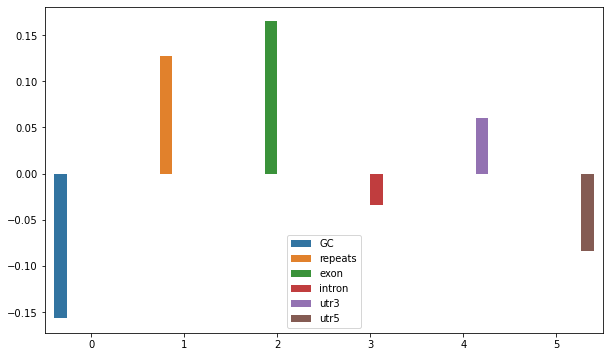

In [354]:

    importances = reg.coef_.ravel()

    leg=['GC', "repeats", "exon", "intron", "utr3", "utr5"]
    repeated_amino =  leg * (len(importances)//6) #np.kron(np.ones(len(importances)//5), np.arange(5))

    plt.figure(figsize=(10,6))
    ax = sns.barplot(y=importances, x=np.arange(len(importances)), hue=repeated_amino, lw=0)
    #ax.set_title(f"Feature importances of {name} protein. Data type: {df_type}, Test AUC: {test_auc_score:.2f}, Delta GC: {delta_gc:.2f}")

In [335]:
#scale for ploting
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

scaled_rbp31_df = rbp31_df.copy()
data = scaled_rbp31_df[["intron", "exon", "utr5", "utr3", "repeats", "GC"]]
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data)
scaled_rbp31_df[["intron", "exon", "utr5", "utr3", "repeats", "GC"]] = scaler.transform(data)
scaled_rbp31_df

In [381]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = scaled_rbp31_df[['GC', "repeats", "exon", "intron", "utr3", "utr5"]].to_numpy()
y = scaled_rbp31_df["DeepAUC"].to_numpy()
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.6518790818204035

In [383]:
scaled_rbp31_df

,Name,intron,exon,utr5,utr3,repeats,BaseAUC,DeepAUC,GC,SoA
0,CLIPSEQ_AGO2,-0.588,-0.462,0.009,-0.207,-0.519,0.600,0.609,-0.022,0.644
1,CLIPSEQ_ELAVL1,0.920,-0.097,-0.443,-0.955,-0.232,0.829,0.877,-0.744,0.920
2,CLIPSEQ_SFRS1,-0.327,-0.932,-1.000,0.589,0.886,0.619,0.795,0.691,0.896
3,CLIPSEQ_elF4AIII_1,-0.321,-0.983,-0.652,0.883,1.000,0.531,0.788,0.283,0.962
4,CLIPSEQ_elF4AIII_2,-0.302,-1.000,-0.541,1.000,0.979,0.560,0.873,0.330,0.965
5,HITSCLIP_AGO_binding_clusters,0.010,-0.914,-0.473,-0.372,0.225,0.624,0.781,-0.184,0.882
6,HITSCLIP_AGO_binding_clusters_2,-0.006,-0.922,-0.491,-0.330,0.246,0.634,0.793,-0.158,0.882
7,ICLIP_HNRNPC,-0.983,0.808,0.819,0.606,-1.000,0.905,0.888,-0.230,0.976
8,ICLIP_NSUN2_293,-0.191,-0.872,-0.991,-0.023,0.080,0.789,0.727,1.000,0.872
9,ICLIP_TDP43,-1.000,0.622,1.000,0.806,-0.927,0.686,0.836,-0.022,0.930


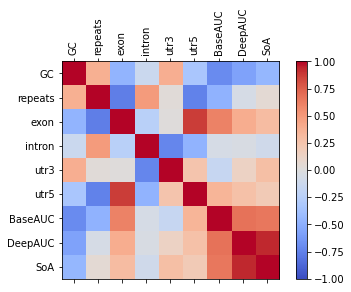

In [384]:
data = scaled_rbp31_df[['GC', "repeats", "exon", "intron", "utr3", "utr5", "BaseAUC", "DeepAUC", "SoA"]]

corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [379]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression(),
)
polynomial_regression.fit(X, y)
polynomial_regression.score(X,y)

0.9944161149919383

In [356]:
fig = px.scatter(scaled_rbp31_df, 
                 x=rbp31_df.BaseAUC,
                 y=rbp31_df.GC, 
                 hover_name="Name",
                 title="Log2FC of exon percentage, repeat percentage and GC content between pos and neg influence on LogReg permonace",
                 trendline="ols",
                 width=1400, height=800)
fig.update_layout(xaxis_title="Scaled log2fc value")
fig.show()

In [208]:
fig = px.scatter(rbp31_df, 
                 x=rbp31_df.GC,  
                 y=rbp31_df.sota, 
                 hover_data=rbp31_df.columns,
                 title="Log2FC of exon percentage, repeat percentage and GC content between pos and neg influence on LogReg permonace",
                 trendline="ols",
                 width=1400, height=800)
fig.update_layout(xaxis_title="Scaled log2fc value")
fig.show()

## GC count, Repeats BOX plots both datasets

### RBP24 dataset prep

In [4]:
rbp24_baseline_results = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp24_baseline_results.tsv", index_col=0, header=0, delimiter="\t")
rbp24_gc = rbp24_baseline_results[rbp24_baseline_results.DataType == "original"].sort_values(by=["Protein"]).rename(columns={"Protein":"Name"}).reset_index(drop=True).loc[:, ["Name", "PosGC", "NegGC"]]

rbp24 = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp24_intersections.tsv", delimiter="\t", index_col=0)
rbp24_wide = rbp24_gc.merge(rbp24, on="Name")
pos_rbp24 = rbp24_wide.iloc[:, [0,1,3,4,5,6,7]].rename(columns={"PosGC":"GC","pos_intron":"intron", "pos_exon":"exon", "pos_5utr":"utr5", "pos_3utr":"utr3", "pos_repeats":"repeats"})
pos_rbp24["Set"] = "Positives"

neg_rbp24 = rbp24_wide.iloc[:, [0,2,8,9,10,11,12]].rename(columns={"NegGC":"GC","neg_intron":"intron", "neg_exon":"exon", "neg_5utr":"utr5", "neg_3utr":"utr3", "neg_repeats":"repeats"})
neg_rbp24["Set"] = "Negatives"

rbp24 = pd.concat([neg_rbp24, pos_rbp24])
rbp24["Dataset"] = "RBP 24"

### RBP31 dataset prep

In [5]:
rbp31_baseline_results = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_baseline_results.tsv", index_col=0, header=0, delimiter="\t")
rbp31_gc = rbp31_baseline_results[rbp31_baseline_results.DataType == "original"].sort_values(by=["Protein"]).rename(columns={"Protein":"Name"}).reset_index(drop=True).loc[:, ["Name", "PosGC", "NegGC"]]

rbp31 = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_intersections.tsv", delimiter="\t", index_col=0)
rbp31_wide = rbp31_gc.merge(rbp31, on="Name")
pos_rbp31 = rbp31_wide.iloc[:, [0,1,3,4,5,6,7]].rename(columns={"PosGC":"GC","pos_intron":"intron", "pos_exon":"exon", "pos_5utr":"utr5", "pos_3utr":"utr3", "pos_repeats":"repeats"})
pos_rbp31["Set"] = "Positives"

neg_rbp31 = rbp31_wide.iloc[:, [0,2,8,9,10,11,12]].rename(columns={"NegGC":"GC","neg_intron":"intron", "neg_exon":"exon", "neg_5utr":"utr5", "neg_3utr":"utr3", "neg_repeats":"repeats"})
neg_rbp31["Set"] = "Negatives"

rbp31 = pd.concat([neg_rbp31, pos_rbp31])
rbp31["Dataset"] = "RBP 31"

df = pd.concat([rbp24, rbp31]).sort_values("Set", ascending=False)

In [9]:
#GC count porovnanie
df_gc = df.melt(id_vars=['Name', 'Set', 'Dataset'], value_vars=["GC"])

fig = px.box(df_gc, y="value", x="Dataset", color="Set", points="all", hover_data=df_gc.columns)
fig.update_layout(yaxis_title="GC count")
fig.update_layout(
    yaxis_title="GC count",
    font_family="Times New Roman",
    font_size=18,
    autosize=False,
    width=800,
    height=500,
    showlegend=False)
fig.show()

In [10]:
#repeat percantage porovnanie
df_repeats = df.melt(id_vars=['Name', 'Set', 'Dataset'], value_vars=["repeats"])

fig = px.box(df_repeats, y="value", x="Dataset", color="Set", points="all", hover_data=df_repeats.columns)
fig.update_layout(yaxis_title="\% repeats")
fig.update_layout(
    yaxis_title="% of repeats",
    autosize=False,
    font_family="Times New Roman",
    font_size=18,
    width=800,
    height=500,
    showlegend=False)
fig.show()

In [566]:
df_repeats[df_repeats.Name=="CLIPSEQ_SFRS1"]

,Name,Set,Dataset,variable,value
23,CLIPSEQ_SFRS1,Positives,RBP 31,repeats,3.720
26,CLIPSEQ_SFRS1,Positives,RBP 24,repeats,0.930
81,CLIPSEQ_SFRS1,Negatives,RBP 24,repeats,27.070
105,CLIPSEQ_SFRS1,Negatives,RBP 31,repeats,36.980


In [15]:
rbp24_df = df[df.Dataset == "RBP 24"]
df_regions_rbp24 = rbp24_df.melt(id_vars=['Name', 'Set'], value_vars=["intron", "exon", "utr5", "utr3"], var_name="region")

fig = px.box(df_regions_rbp24, y="value", x="region", color="Set", points="all", hover_data=df_regions_rbp24.columns)
fig.update_layout(yaxis_title="\% repeats")
fig.update_layout(
    title="RBP 24",
    #template="simple_white",
    title_x=0.5,
    font_family="Times New Roman",
    font_size=18,
    yaxis_title="% of region",
    autosize=False,
    width=800,
    height=400,
    showlegend=False)
fig.show()

In [16]:
rbp31_df = df[df.Dataset == "RBP 31"]
df_regions_rbp31 = rbp31_df.melt(id_vars=['Name', 'Set'], value_vars=["intron", "exon", "utr5", "utr3"], var_name="region")

fig = px.box(df_regions_rbp31, y="value", x="region", color="Set", points="all", hover_data=df_regions_rbp31.columns)
fig.update_layout(yaxis_title="\% repeats")
fig.update_layout(
    title="RBP 31",
    title_x=0.5,
    font_family="Times New Roman",
    font_size=18,
    yaxis_title="% of region",
    autosize=False,
    width=800,
    height=400,
    showlegend=False)
fig.show()

In [183]:
rbp31_wide[rbp31_wide.Name == "CLIPSEQ_elF4AIII_1"]

,Name,PosGC,NegGC,pos_intron,pos_exon,pos_5utr,pos_3utr,pos_repeats,neg_intron,neg_exon,neg_5utr,neg_3utr,neg_repeats
3,CLIPSEQ_elF4AIII_1,45.769,46.292,37.700,43.890,9.930,8.470,3.280,71.450,14.810,4.800,8.940,40.320


In [262]:
rbp31_wide[rbp31_wide.Name == "PARCLIP_FUS"]

,Name,PosGC,NegGC,pos_intron,pos_exon,pos_5utr,pos_3utr,pos_repeats,neg_intron,neg_exon,neg_5utr,neg_3utr,neg_repeats
24,PARCLIP_FUS,33.472,45.818,73.710,6.430,4.070,15.790,31.480,72.990,13.210,5.200,8.610,38.930


In [30]:
rbp24_wide.PosGC.astype("float") - rbp24_wide.NegGC.astype("float")

0      3.981
1      6.683
2      4.361
3     -0.437
4     -5.205
5    -10.818
6      4.949
7     -4.331
8     -3.287
9     -8.784
10    -7.941
11    -1.764
12   -10.569
13   -10.507
14    -7.494
15    -9.335
16   -12.508
17    -3.404
18    -7.753
19   -11.521
20    -8.137
21    -7.662
22    -3.032
dtype: float64

## Region Log2FC boxplots both datasets

In [241]:
rbp24 = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp24_intersections_log2fc.tsv", delimiter="\t", index_col=0)
rbp24["Dataset"] = "RBP 24"
rbp31 = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp31_intersections_log2fc.tsv", delimiter="\t", index_col=0)
rbp31["Dataset"] = "RBP 31"

df_regions = pd.concat([rbp24,rbp31])
df_regions = df_regions.melt(id_vars=['Name', 'Dataset'], value_vars=["intron", "exon", "3utr", "5utr"], var_name="region")


In [250]:
fig = px.violin(df_regions, y="value", x="Dataset", points="all", color="region", box=False, hover_data=df_regions.columns)

fig.update_layout(
    yaxis_title="Positive to Negative Log2FC",
    autosize=False,
    width=1000,
    height=600,
    showlegend=True)
fig.show()

In [4]:
rbp24_df = pd.read_csv("/home/mrkvrbl/Diplomka/Data/outputs/rbp24_baseline_evals_new.tsv", delimiter="\t", index_col=0, header=0)
rbp24_df['Train_DeltaGC'] = rbp24_df.Train_PosGC - rbp24_df.Train_NegGC
rbp24_df['Test_DeltaGC'] = rbp24_df.Test_PosGC - rbp24_df.Test_NegGC
rbp24_df['Dataset'] = "RBP24"

rbp24_df

,Protein,Train_PosGC,Train_NegGC,Test_PosGC,Test_NegGC,TestACC,TestAUC,DataType,Train_DeltaGC,Test_DeltaGC,Dataset
0,CAPRIN1_Baltz2012,44.177756,44.488165,43.984158,44.516832,0.499000,0.510744,original,-0.310409,-0.532673,RBP24
1,CAPRIN1_Baltz2012,44.177756,44.488165,43.984158,41.024752,0.492000,0.490208,distributed,-0.310409,2.959406,RBP24
2,ICLIP_TIA1,35.222214,44.689271,35.027723,44.825743,0.760000,0.835340,original,-9.467057,-9.798020,RBP24
3,ICLIP_TIA1,35.222214,44.689271,35.027723,41.604950,0.740000,0.812840,distributed,-9.467057,-6.577228,RBP24
4,PARCLIP_IGF2BP123,41.011132,44.259511,40.528713,44.479208,0.575000,0.599808,original,-3.248378,-3.950495,RBP24
5,PARCLIP_IGF2BP123,41.011132,44.259511,40.528713,42.197030,0.553000,0.565860,distributed,-3.248378,-1.668317,RBP24
6,PARCLIP_FUS,33.179469,43.062199,33.273267,43.015842,0.737000,0.814736,original,-9.882730,-9.742574,RBP24
7,PARCLIP_FUS,33.179469,43.062199,33.273267,40.288119,0.734000,0.807192,distributed,-9.882730,-7.014851,RBP24
8,ZC3H7B_Baltz2012,40.597602,43.605260,40.126733,42.699010,0.566000,0.568972,original,-3.007658,-2.572277,RBP24
9,ZC3H7B_Baltz2012,40.597602,43.605260,40.126733,40.014851,0.513000,0.504300,distributed,-3.007658,0.111881,RBP24


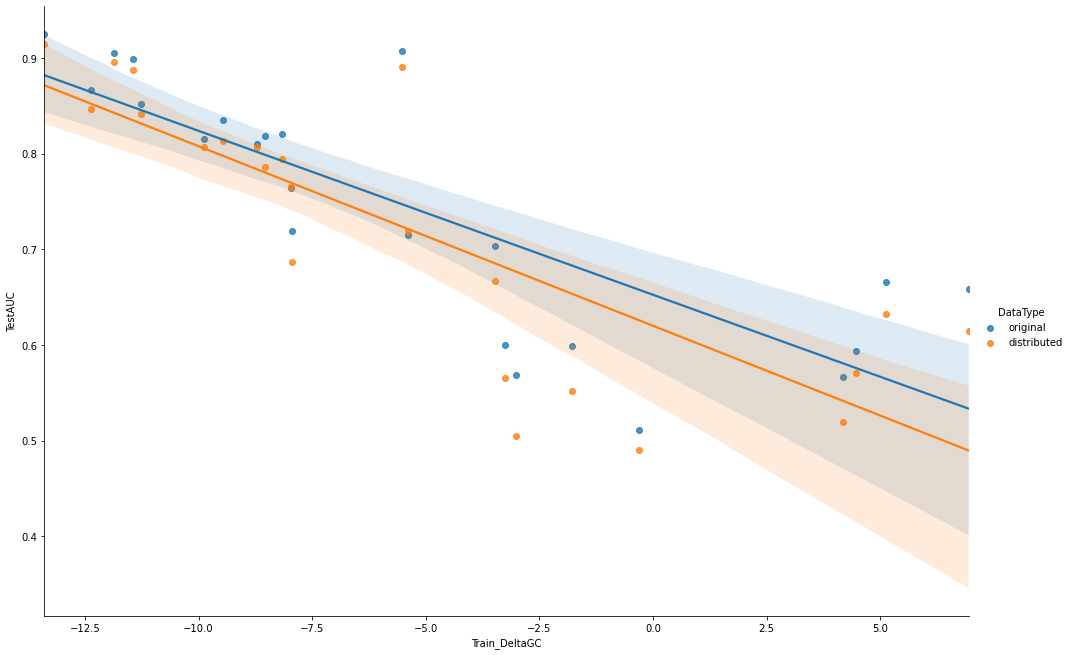

In [6]:
sns.lmplot(x="Train_DeltaGC", y="TestAUC", hue='DataType', data=rbp24_df, height=9, aspect=1.5)

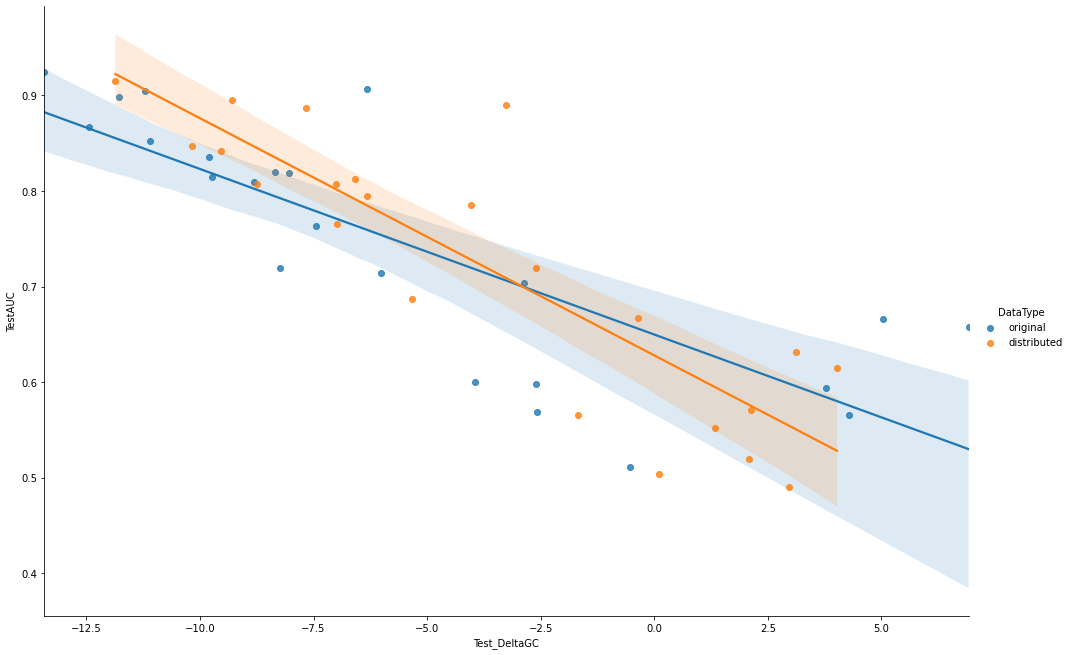

In [8]:
sns.lmplot(x="Test_DeltaGC", y="TestAUC", hue='DataType', data=rbp24_df, height=9, aspect=1.5)

In [10]:
rbp24_df[rbp24_df.DataType=="original"].TestAUC.mean()

0.7441111131199811

In [11]:
rbp24_df[rbp24_df.DataType=="distributed"].TestAUC.mean()

0.720437266210591

In [ ]:
skratky = ["RBP", "CLIP", "RNP", "mRNA", "ncRNA", "RBD","RNA Pol II", "RT","PCR", "SDS-PAGE", "cDNA", "HITS-CLIP", "PAR-CLIP", "iCLIP", "rRNA", "tRNA", "LSTM", "CNN", "ML", "DFFNN", "ReLU", "RNN", "OHE", ""]